In [135]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# Introduction à Numpy

-----------------------------------------

***Basile Marchand (Centre des Matériaux @ Mines ParisTech/CNRS/Université PSL)***

## Numpy 

NumPy est un module Python permettant de travailler avec des tableaux multidimensionel. En effet Python ne dispose pas nativement de notions de tableaux et donc par extensions encore moins des notions de matrices. 

Il est donc nécessaire d'utiliser un module particulier, qui n'est pas un module de la librairie standard Python. **Le** module recommandé pour la manipulation de tableau multidimensionnel (cela inclu donc les matrices) est donc **NumPy**. 

Pour preuve de la reconnaissance de ce module ainsi que de ses performances il faut souligner qu'il s'agit du module qui est employé à peu prêt dans tous les autres modules scientifiques disponibles dans Python. Le secret du module NumPy est que par un soucis de performances ce dernier n'est pas développer en Python mais en C++. 

Bien évidemment l'utilisation de ce module se fait de la manière classique : 

```python
import numpy
```

Cependant par soucis de simplicité vous verrez quasiment toujours l'import réalisé en donnant un alias à numpy  :

```python
import numpy as np
```

L'objet de base dans NumPy, celui que l'on va manipuler par la suite, est le **np.ndarray**. Un **np.ndarray** numpy est un tableau multidimensionnel de même type (on ne peut pas mélanger entier, flottant et chaine de caractère dans un même **np.ndarray** par exemple). On appelle *rang* de l'**np.ndarray** le nombre de dimension de ce dernier : 
* *rang de 1* : tableau à 1 dimension donc une ligne de M colonnes
* *rang de 2* : tableau à 2 dimension donc N lignes et M colonnes
* *rang de 3* : tableau à trois dimensions (un pavé dans l'espace) 
* etc 

Et la forme de l'*array*, *shape* en anglais, est un N-uplet qui caractérise la taille du tableau suivant chacune de ses dimensions. Par exemple :
* Un vecteur ligne de taille **N** correspond à un **array** avec rank=1 et shape=(N,)
* Un vecteur colonne de taille **N** correspond à un **array** avec rank=2 et shape=(N,1)
* Une matrice rectangulaire **NxM** correspond à un **array** avec rank=2 et shape=(N,M)
* Une hypermatrice carré **NxNxN** correspond à un **array** avec rank=3 et shape=(N,N,N)


### Création d'un **array**

La définition d'un `np.ndarray` à partir d'un ensemble de valeurs se fait en utisant `np.array` de la manière suivante : 

In [136]:
import numpy as np
une_matrice_3_3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(f"une matrice 3x3 : \n{une_matrice_3_3}")
un_vecteur_colonne = np.array([[1,], [2,], [3,]]) 
print(f"un vecteur colonne : \n{un_vecteur_colonne}")
un_vecteur_ligne = np.array([1,2,3])
print(f"un vecteur ligne : \n{un_vecteur_ligne}")
un_tableau_3_dimension = np.array( [[[1,2,3],[2,5,6]], [[11,12,13],[14,15,16]]])
print(f"un tableau 3 dimension :\n{un_tableau_3_dimension}")

une matrice 3x3 : 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
un vecteur colonne : 
[[1]
 [2]
 [3]]
un vecteur ligne : 
[1 2 3]
un tableau 3 dimension :
[[[ 1  2  3]
  [ 2  5  6]]

 [[11 12 13]
  [14 15 16]]]


Pour connaitre le rang et la forme d'un **array** NumPy il suffit de procéder de la manière suivante : 

In [226]:
forme = un_vecteur_colonne.shape 
rang  = un_vecteur_colonne.ndim  ## len(un_vecteur_colonne.shape)
print(f"shape = {forme}")
print(f"rank  = {rang}")


shape = (3, 1)
rank  = 2


De plus pour connaitre le nombre d'éléments contenu dans un `np.array` il suffit simplement d'accéder à l'attribut size de ce dernier. Par exemple : 

In [138]:
nElement = un_vecteur_colonne.size
print(f"size = {nElement}")

size = 3


Afin d'initialiser un **array** NumPy dispose d'un certain nombre de fonction permettant de créer des tableaux. 
* `np.zeros` qui permet de créer un tableau ne contenant que des zéros
* `np.zeros_like` qui permet de construire une matrice de zéros ayant la même forme qu'une autre matrice donnée en entrée.
* `np.ones` qui créé un tableau ne contenant que des uns.
* `np.eye` qui créé un tableau identité
* `np.random.rand` qui créé une matrice comptenant des valeurs aléatoires.

Ci-dessous des exemples d'utilisation de chacune de ces fonctions. 

In [5]:
import numpy as np
print("np.zeros")
zero = np.zeros((2,4))
print(zero)
print("np.ones")
ones = np.ones((5,1)) 
print(ones)
print("np.zeros_like")
m = np.ones((2,3))
zero_like = np.zeros_like(m)
print(zero_like)
print("np.eye")
eye = np.eye(4)
print(eye)
print("np.random.rand")
r = np.random.rand(3,5,6)
#print(r)
print("np.linspace")
lin = np.linspace(0., 10., 100)
print(lin)
print("np.arange")
ran = np.arange(0, 10., 0.2)
print(ran)


np.zeros
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
np.ones
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
np.zeros_like
[[0. 0. 0.]
 [0. 0. 0.]]
np.eye
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
np.random.rand
np.linspace
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464

### Un mot sur les `np.matrix` 

Il existe dans numpy un object de type `matrix`. A première vue il serait tentant de croire que c'est le truc idéal pour les applications cibles en prépa. Et bien non c'est une fausse bonne idée !! Il ne faut surtout pas utiliser les `np.matrix` car cela ne fera qu'introduire des bugs bizarre dans les codes. 

### Un mot sur ce que nous impose le C++ derrière numpy

In [140]:
tableau = np.random.rand(10)
print(f"tableau = {tableau}")

tableau = [0.78123436 0.10077886 0.0956136  0.01739688 0.57828268 0.48224953
 0.36182211 0.74507335 0.99966304 0.67845184]


In [141]:
tableau[0] = int(10)
print(f"tableau = {tableau}")

tableau = [10.          0.10077886  0.0956136   0.01739688  0.57828268  0.48224953
  0.36182211  0.74507335  0.99966304  0.67845184]


In [142]:
try:
    tableau[0] = "coucou"
except Exception as e: 
    print(e.args[0])

could not convert string to float: 'coucou'


Et oui les `np.array` ne sont pas comme les listes Python, ce sont des conteneurs homogènes. Impossible d'y ranger des valeurs de types différents, `numpy` cherchera toujours à convertir ce que vous lui donnez dans le type du tableau. 

Ce comportement peut paraitre étrange, étant donné le caractère dynamiquement typé du Python !! Mais je vous rappelle que NumPy n'est pas développé en Python mais en C++. Or le C++ est un langage à typage statique. C'est le prix à payer pour avoir de la performance ! Ainsi à chaque `np.ndarray` est associé un type. Pour connaitre le type des éléments il suffit d'accéder à l'attribut `dtype`. Par exemple :  

In [143]:
tableau.dtype

dtype('float64')

Vous voyez donc que le type des valeurs pouvant être contenue dans le tableau est donc `float64` ce qui correspond à un flottant double précision (codé sur 64 bits). Donc tous les éléments que l'on va vouloir ranger dans le tableau vont être converti en `float64`. Si cette conversion n'est pas possible on a alors une erreur ! 

Il est possible de changer le type `np.ndarray` pour cela il suffit d'utiliser la méthode `astype`. Par exemple si je veux convertir le tableau `tableau` qui ne contient que des `float64` en un tableau contenant des `int32` il suffit de procéder de la manière suivante : 

In [144]:
tableauInt = tableau.astype(np.int32)
print(tableau)
print(f"tableauInt = {tableauInt}")

[10.          0.10077886  0.0956136   0.01739688  0.57828268  0.48224953
  0.36182211  0.74507335  0.99966304  0.67845184]
tableauInt = [10  0  0  0  0  0  0  0  0  0]


In [145]:
tableauInt.dtype

dtype('int32')

Vous remarquez alors que la plupart des valeurs deviennent `0`. C'est parce que la conversion d'un `float64` a un entier se fait en faisant un troncature tout simplement ! 

Bien évidemment il est possible à la création d'un `np.ndarray` de spécifier le type d'élément que l'on souhaite, ce qui bypass le mécanisme de déduction de type de numpy. Par exemple si on créé un tableau à partir d'une liste ne contenant que des entiers. 

In [146]:
tableau_no_type = np.array([1,2,3,4])
print(f"type = {tableau_no_type.dtype}")

type = int64


Numpy en déduit automatiquement un type `int64`. 

Mais si je souhaite avoir des `float64` comment faire ? La solution bête et méchante est de mettre des points dans la liste que je fourni en entrée, par exemple : 

In [147]:
tableau_no_type = np.array([1.,2.,3.,4.])
tableau_no_type.dtype

dtype('float64')

Au passage une remarque, si je ne mets qu'un point dans le liste au premier élement par exemple numpy va quand même considérer des `float64`. Car en présence d'une liste hétérogène NumPy prendra le type de plus haut niveau, dans ce cas les `float64`. 

In [231]:
import numpy as np 
tableau_no_type = np.array([1.,2,3,4])
print(tableau_no_type.dtype)
print(tableau_no_type)

float64
[1. 2. 3. 4.]


L'autre solution un peu plus élégante est de spécifier le type du `np.ndarray` via l'argument optionnel `dtype` de `np.array`. Par exemple : 

In [149]:
tableau_typed = np.array([1,2,3,4], dtype=np.float64)
tableau_typed.dtype

dtype('float64')

In [150]:
tableau_typed[0] = 10.6
tableau_typed

array([10.6,  2. ,  3. ,  4. ])

### Opérations mathématiques et vectorisation 

NumPy permet de créer des tableaux multidimensionnel, nous venons de le voir. Mais une fois le tableau avec des données créé il faut pouvoir appliquer des traitements à ces données. Évidemment NumPy est la pour ça également ! 

Pour commencer les opérations de bases `+`, `-`, `*`, `/` sont toutes disponibles dans numpy.

Deux cas de figures à considérer : 

1. Opération entre deux `np.ndarray` : **les opérations sont termes à termes, y compris pour `*`**
2. Opération entre un `np.ndarray` et un nombre

Par exemple : 

In [151]:
a = np.array([[1,2,3],[4,5,6]], dtype=np.float64)
b = np.array([[1,2,3],[4,5,6]], dtype=np.float64)

In [152]:
a + b 

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [153]:
a - b 

array([[0., 0., 0.],
       [0., 0., 0.]])

In [154]:
a * b

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [155]:
a / b 

array([[1., 1., 1.],
       [1., 1., 1.]])

**Broadcasting** 

NumPy pour les opérations de base a un comportement qui peut vous sembler étrange lorsque les deux `np.ndarray` n'ont pas des `shape` concordantes. C'est ce qu'on appelle le broadcasting ! Si je somme un tableau `2,3` et un tableau `3,`, logiquement nous dirions que cela ne doit pas fonctionner. Mais dans les faits : 

In [156]:
c = np.array([1,2,3], dtype=np.float64)

In [157]:
print(f"a={a}")
print(f"c={c}")
a + c

a=[[1. 2. 3.]
 [4. 5. 6.]]
c=[1. 2. 3.]


array([[2., 4., 6.],
       [5., 7., 9.]])

Numpy a dans les faits remplacer le tableau `c=np.array([1,2,3])` par `np.array([[1,2,3], [1,2,3]])`. Ce comportement fonctionne pour toutes les opérations de base 

In [158]:
a / c

array([[1. , 1. , 1. ],
       [4. , 2.5, 2. ]])

In [159]:
d = np.array([[1.,], [2.,]])
print(a)
print(d)

[[1. 2. 3.]
 [4. 5. 6.]]
[[1.]
 [2.]]


In [6]:
a + d

NameError: name 'a' is not defined

In [7]:
v1 = np.array([1,2,3])
v2 = np.array([[1,], [2,],[3]])
v1*v2

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

C'est ce `broadcasting` qui nous permet également de faire les opérations de base entre un `np.ndarray` et un nombre. Par exemple : 

In [161]:
2. * a 

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [162]:
2 + a

array([[3., 4., 5.],
       [6., 7., 8.]])

In [163]:
print(a)
2 / a 

[[1. 2. 3.]
 [4. 5. 6.]]


array([[2.        , 1.        , 0.66666667],
       [0.5       , 0.4       , 0.33333333]])

In [164]:
a / 2. 

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

**Le cas particulier du produit matriciel** 

La question que vous vous posez certainement est mais est-ce que numpy sait faire un produit matriciel tel qu'on l'apprend à nos élèves de prépa ?

Pas d'inquiètude la réponse est OUI ! C'est juste que le produit matriciel entre deux `np.ndarray` qui auraient les tailles qui vont bien n'est pas symbolisé par l'opérateur `*` mais par `np.dot` ou `@`. 

Par exemple : 

In [8]:
a = np.random.rand(4,2)
b = np.random.rand(2,5)

In [9]:
a @ b 

array([[0.2198335 , 0.11082535, 0.1956089 , 0.40256804, 0.35602135],
       [0.55340991, 0.23175136, 0.3858212 , 0.80441029, 0.78969818],
       [0.47705646, 0.19147569, 0.31385713, 0.65669828, 0.66202105],
       [0.11948114, 0.14892453, 0.30645629, 0.61120632, 0.39354043]])

In [10]:
np.dot(a, b)
a.dot(b)

array([[0.2198335 , 0.11082535, 0.1956089 , 0.40256804, 0.35602135],
       [0.55340991, 0.23175136, 0.3858212 , 0.80441029, 0.78969818],
       [0.47705646, 0.19147569, 0.31385713, 0.65669828, 0.66202105],
       [0.11948114, 0.14892453, 0.30645629, 0.61120632, 0.39354043]])

De la même manière pour faire un produit matrice-vecteur, qui n'est rien d'autre que le produit d'un tableau $M\times N$ par une matrice $N\times 1$, on procède de la manière suivante : 

In [11]:
v = np.random.rand(2,1)

a@v

array([[0.49806786],
       [1.06268985],
       [0.88248298],
       [0.62956606]])

**La transposée d'un tableau** 

Autre élément incontournable du calcul matriciel, la transposée. Évidemment là encore Numpy a tout prévu. Pour calculer la transposée d'un `np.ndarray` il suffit de procéder de la manière suivante : 

In [12]:
a = np.random.rand(2,4)
a

array([[0.95888405, 0.66399018, 0.12339923, 0.00417275],
       [0.61878416, 0.82744894, 0.12221623, 0.11730532]])

In [13]:
b1 = a.T
b1

array([[0.95888405, 0.61878416],
       [0.66399018, 0.82744894],
       [0.12339923, 0.12221623],
       [0.00417275, 0.11730532]])

In [14]:
b2 = np.transpose(a)
b2 

array([[0.95888405, 0.61878416],
       [0.66399018, 0.82744894],
       [0.12339923, 0.12221623],
       [0.00417275, 0.11730532]])

Attention l'opération de transpositon ne s'applique qu'à des `np.ndarray` de rang supérieur ou égal à 2. Par exemple la transposé d'un "vecteur ligne" ne donne pas un vecteur colonne :

In [18]:
v = np.random.rand(4)
print(f"v = {v}")
vt = v.T
print(f"vt = {vt}")

vt = v.reshape((-1,1))
print(f"vt = {vt}")


v = [0.91199577 0.97393548 0.80517366 0.58756618]
vt = [0.91199577 0.97393548 0.80517366 0.58756618]
vt = [[0.91199577]
 [0.97393548]
 [0.80517366]
 [0.58756618]]


### Opérations plus complexes 

Bien évidemment les opérations `+`, `-`, `*`, `/` ne sont pas les seules disponibles. Toutes les fonctions mathématiques classiques sont définies dans numpy. 

* `np.cos`, `np.sin`, `np.tan`
* `np.arccos`, `np.arcsin`, `np.arctan`
* `np.degrees`, `np.radians`
* `np.exp`, `np.log`

L'intérêt de ces fonctions, qui existent déjà toutes dans le module `math` de Python, est qu'elles sont faites pour travailler sur des `np.ndarray`. 

Par exemple si on évaluer la fonction $\sin x$. 

En Python de base on ferait quelque chose du genre 

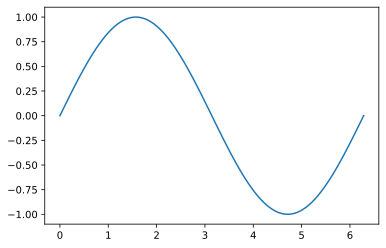

In [173]:
import math
nStep = 100
x = [ 2*math.pi*i/nStep for i in range(nStep+1)]
y = [ math.sin(x_i) for x_i in x]

import matplotlib.pyplot as plt 
plt.plot(x,y)
plt.show()



Tandis qu'en utilisant NumPy nous pouvons directement écrire : 

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

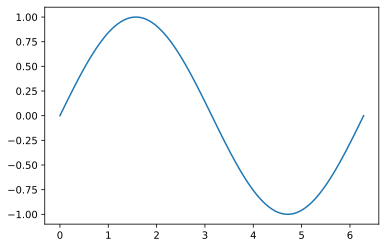

In [174]:
xNumpy = np.linspace(0, 2*np.pi, nStep)
print(xNumpy)
yNumpy = np.sin(xNumpy)
plt.plot(xNumpy,yNumpy)
plt.show() 

Il y a deux avantages à l'approche Numpy : 

1. C'est plus simple à coder et plus agréable à lire par la suite 
2. C'est beaucoup plus performant 

In [175]:
%timeit [math.sin(x_i) for x_i in x]

17.3 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [176]:
%timeit np.sin(xNumpy)


3.24 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


On observe donc un facteur 4 entre la version Python de base et la version NumPy et je peux vous assurer que les choses s'aggravent bien plus lorsque l'on passe sur des vrais problèmes ! 

Vous pouvez vous demander pourquoi cela va 4 fois plus vite !? C'est tout simplement parce que d'un côté vous faites la boucle dans le monde Python tandis que de l'autre côté la boucle se fait dans le monde Numpy donc C++. 

Dans les grandes lignes caché derrière tout ça se trouve le fait que les tableaux numpy sont en réalité alloués en mémoire de manière contigue, il s'agit de `double*`. Et donc le c++ se débrouille à merveille pour parcourir tout le tableau et appliquer une fonction à tous les éléments. Tandis que le Python a plus de mal car ne présuppose pas d'un alignement mémoire et donc passe son temps à faire des indirections. 

__La règle de base à retenir est que lorsque l'on manipule des tableaux numpy il ne faut **jamais** faire de boucles__

Si vous souhaitez appliquer une fonction "perso" à un `np.ndarray` il est possible en utilisant la fonction `np.vectorize` de vectoriser votre fonction. 

In [177]:
def ma_fonction(x):
    if x < 0.5:
        return x 
    else:
        return -x

Sans vectorisation il faudrait faire quelque chose du genre : 

In [178]:
data = np.random.rand(10,20,30)

In [179]:
%%timeit
for i,x in enumerate(data):
    for j, y in enumerate(x): 
        for k, z in enumerate(y): 
            data[i,j,k] = ma_fonction(z)

3.76 ms ± 844 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Tandis que si l'on vectorise la fonction `ma_fonction` cette triple boucle pas très sympatique se ramène à quelque chose de beaucoup plus agréable : 

In [180]:
ma_fonction_vect = np.vectorize(ma_fonction)

%timeit ma_fonction_vect(data)


1.36 ms ± 568 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


On observe donc un gain significatif à l'exécution et le plus important le code est beaucoup plus agréable à lire. 

### Manipulation des array 

Jusqu'à maintenant nous avons vu comment définir des `np.ndarray` et comment utiliser ces tableaux pour faire des évaluations plus ou moins complexe. C'est bien mais ce n'est pas suffisant pour couvrir 100% des besoins. Dans de nombreux cas il nous faut pouvoir acccéder à des valeurs particulières d'un tableau. 

La manipulation des `np.ndarray` NumPy et notamment l'accès aux valeurs contenues dans ce dernier se fait dans le même esprit que l'accès aux éléments d'une liste à la différence près que l'on doit spécifier pour un `np.ndarray` plusieurs indices étant donné qu'il s'agit d'un tableau multidimensionnel. 

> **Attention :**  
> Comme pour les listes et tuples la numérotation des indices commence à **0**

In [20]:
un_tableau = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
print("Le tableau : \n{}".format(un_tableau))



Le tableau : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


L'accès aux éléments d'un np.ndarray se fait de la même manière que pour accéder aux valeurs d'une liste, à savoir en utilisant l'opérateur `[]`. La subtilité est que l'opérateur `[]` d'un `np.ndarray` peut prendre en entrée plusieurs indices. 

In [21]:
a_12 = un_tableau[1,2]
print(f"Element 1,2 : {a_12}")
print("Le tableau : \n{}".format(un_tableau))



Element 1,2 : 8
Le tableau : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


On peut également utiliser les indices négatifs pour accéder aux valeurs par la fin : 

In [22]:
a_24 = un_tableau[-1,-1]
print(f"Element -1,-1 : {a_24}")
print("Le tableau : \n{}".format(un_tableau))


Element -1,-1 : 15
Le tableau : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


De plus, comme pour les listes, on peut utiliser le concept de slicing. Pour rappel la notation est de la forme : 

```
start:stop+1:step
```

Par exemple, si je veux extraire la première ligne de la matrice `un_tableau` on peut procéder de la manière suivante : 

In [23]:
ligne_0 = un_tableau[0,:]
print(f"Ligne_0 : {ligne_0}")
print("Le tableau : \n{}".format(un_tableau))


Ligne_0 : [1 2 3 4 5]
Le tableau : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


On peut alors se servir de ces notations pour extraire un sous tableau : 

In [24]:
sub_array = un_tableau[1:,1:]

print(sub_array)

print("Le tableau : \n{}".format(un_tableau))

[[ 7  8  9 10]
 [12 13 14 15]]
Le tableau : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


In [25]:
sub_array = un_tableau[:,0]
print(sub_array)
print(sub_array.shape)

[ 1  6 11]
(3,)


In [26]:
sub_array = un_tableau[::2,::2]
print(sub_array)
print("Le tableau : \n{}".format(un_tableau))


[[ 1  3  5]
 [11 13 15]]
Le tableau : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


Le sous-tableau que l'on obtient alors est un peu particulier c'est ce qu'on appelle une vue. Quelle particularité ? Un exemple sera plus parlant : 

In [27]:
un_tableau

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [28]:
sub_array

array([[ 1,  3,  5],
       [11, 13, 15]])

In [29]:
sub_array[0,1] = 10
sub_array

array([[ 1, 10,  5],
       [11, 13, 15]])

In [30]:
un_tableau  

array([[ 1,  2, 10,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

Et là c'est le drame, ou pas, le sous-tableau n'étant qu'une vue lorsqu'on modifie un valeur dans la vue on modifie la case correspondante dans le tableau d'origine. 

Donc attention avec les sous-tableaux c'est très très pratique, et en terme de coût de calcul cela permet de faire des optimisations assez élégantes mais en revanche il faut toujours avoir dans un coin de sa tête le fait que l'on travail sur une vue. 

**Une remarque sur l'extraction de sous-tableau :** 

Ainsi il est possible de cette manière d'accéder à un sous-tableau. Cependant dans de nombreuses applications, il est nécessaire d'avoir accès a un sous-tableau, souvent discontinu, uniquement à partir de liste d'indices de lignes et de colonnes. Or si l'on fait ca directement on peut observer ci-dessous que le sous-tableau extrait ne correspond pas. 

In [254]:
matrice_a = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
print("La matrice complète : \n{}".format(matrice_a))
idx_i = [0,2]
idx_j = [1,4]
sous_matrice = matrice_a[idx_i, idx_j]
print("La sous-matrice par la mauvaise approche : \n{}".format(sous_matrice))

La matrice complète : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
La sous-matrice par la mauvaise approche : 
[ 2 15]


Afin d'avoir le résultat souhaité il est nécessaire d'utiliser la fonction `np.ix_`. Cette dernière permet de générer à partir de deux listes d'indices, le **mask** de valeurs souhaitées. 

In [255]:
matrice_a = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
print(f"La matrice complète : \n{matrice_a}")
idx_i = [0,2]
idx_j = [1,4]

mask = np.ix_(idx_i, idx_j)
print(f"mask : {mask}")

sous_matrice = matrice_a[np.ix_(idx_i, idx_j)]

print("La sous-matrice par np.ix_ : \n{}".format(sous_matrice))
sous_matrice = matrice_a[np.ix_([0,2], [1,4])]

La matrice complète : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
mask : (array([[0],
       [2]]), array([[1, 4]]))
La sous-matrice par np.ix_ : 
[[ 2  5]
 [12 15]]


On vient donc de voir que l'on peut facilement extraire des sous-tableaux mais bien évidemment à l'aide de cela on peut facilement insérer des valeurs par bloque au sein d'un tableau de plus grande dimension. Par exemple : 

In [194]:
big_array = np.zeros((6,6))
little_array = np.eye(3)
print(f"Big array : \n{big_array}")
print(f"Little array : \n{little_array}")
big_array[3:,0:3] = little_array
print(f"Big array après insertion : \n{big_array}")

Big array : 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Little array : 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Big array après insertion : 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [195]:
little_array = np.random.rand(2,2)
print(f"little_array = {little_array}")
big_array[np.ix_([1,3],[1,3])] = little_array
print(f"Big array après insertion: \n{big_array}")

little_array = [[0.74474368 0.51291052]
 [0.28473009 0.32212729]]
Big array après insertion: 
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.74474368 0.         0.51291052 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [1.         0.28473009 0.         0.32212729 0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]]


Parmi les autres manipulations possibles sur les **array** NumPy il y a l'opération `reshape` qui permet de changer la forme d'un tableau. Par exemple : 

In [196]:
array_1 = np.array([[1,2,3],[4,5,6]])
print("Tableau avant reshape {} : \n{}".format( array_1.shape, array_1))

array_2 = array_1.reshape((6,1))
print("Tableau après reshape {} : \n{}".format( array_2.shape, array_2))

array_3 = array_1.reshape((6,))
print("Tableau après reshape {} : \n{}".format( array_3.shape, array_3))


Tableau avant reshape (2, 3) : 
[[1 2 3]
 [4 5 6]]
Tableau après reshape (6, 1) : 
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
Tableau après reshape (6,) : 
[1 2 3 4 5 6]


> **Attention :**  
> Pour que l'opération de reshape puisse fonctionner il est impératif que le nombre d'éléments total soit préserver. C'est à dire qu'il faut impérativement que le produit des tailles suivant chacunes des dimensions soit égale avant et après le `reshape`

> *Astuce :*  
> Pour plus de simplicité vous pouvez lors de l'opération de reshape, laisser une des tailles libre. Cette dernière sera automatiquement déduite des autres afin de satisfaire à la condition de conservation du nombre d'élément. Pour cela il suffit de donner une taille de **-1** à la dimension laissée libre.

In [256]:
vecteur_colonne = array_1.reshape((-1,1))
print(f"Après le reshape((-1,1)) : \n{vecteur_colonne}")


Après le reshape((-1,1)) : 
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


### Opérations booléennes et mask

Un concept clé de NumPy qui nous permet de ne pas faire de boucle `for` pour traiter les données et le concept de mask. Ce dernier est lié aux opérations booléenne. 

Un `mask` c'est quoi ? C'est un tableau, un `np.ndarray` mais qui ne contient que des booléens. Ce `mask` va alors nous permettre d'isoler des parties de `np.ndarray` et ainsi d'appliquer différents traitement à différents éléments d'un tableau. 

Parce qu'un exemple est toujours plus parlant que de grandes phrases : 

In [31]:
data = np.random.rand(10,3)
data

array([[1.79320061e-01, 9.61981537e-01, 1.53898194e-01],
       [5.31106825e-01, 2.34520591e-01, 4.57158472e-01],
       [4.59450069e-01, 8.01723609e-02, 9.36490480e-01],
       [4.11140057e-01, 8.79136075e-01, 6.25821158e-01],
       [8.30485184e-01, 4.60065810e-01, 1.77824675e-05],
       [4.01054167e-01, 3.34354439e-02, 7.83652589e-01],
       [8.77408424e-01, 4.44207926e-01, 7.08836174e-02],
       [5.19533172e-04, 5.31692724e-01, 1.48492208e-01],
       [6.01195532e-01, 3.27023686e-01, 7.88726064e-01],
       [4.11754838e-01, 4.90177402e-01, 5.65125785e-01]])

On peut créer un `mask` correspondant aux valeurs strictement inférieures à `0.5`. 

In [32]:
masque = data < 0.5 
masque

array([[ True, False,  True],
       [False,  True,  True],
       [ True,  True, False],
       [ True, False, False],
       [False,  True,  True],
       [ True,  True, False],
       [False,  True,  True],
       [ True, False,  True],
       [False,  True, False],
       [ True,  True, False]])

Si l'on applique le `mask` au tableau data on ne récupère alors que les valeurs pour lesquelles la case correspondante dans le `mask` est `True`. 

In [33]:
data[ masque ]

array([1.79320061e-01, 1.53898194e-01, 2.34520591e-01, 4.57158472e-01,
       4.59450069e-01, 8.01723609e-02, 4.11140057e-01, 4.60065810e-01,
       1.77824675e-05, 4.01054167e-01, 3.34354439e-02, 4.44207926e-01,
       7.08836174e-02, 5.19533172e-04, 1.48492208e-01, 3.27023686e-01,
       4.11754838e-01, 4.90177402e-01])

L'intéret est que l'on peut alors appliquer en traitement particulier à ces valeurs. Par exemple : 

In [262]:
data[ masque ] = 0. 
data 

array([[0.        , 0.        , 0.        ],
       [0.76081906, 0.66033546, 0.77685713],
       [0.        , 0.94705313, 0.75591596],
       [0.60251185, 0.81107321, 0.        ],
       [0.        , 0.6697804 , 0.        ],
       [0.50558094, 0.795759  , 0.52204154],
       [0.50248221, 0.56822384, 0.        ],
       [0.        , 0.        , 0.5211248 ],
       [0.85522416, 0.        , 0.        ],
       [0.99455928, 0.67411391, 0.91805862]])

La construction d'un mask peut faire intervenir des opérations aussi complexes que vous le souhaitez. Par exemple : 

In [34]:
data = np.random.rand(10,3)
print(data)
mask_0_03 = np.logical_and(data > 0., data < 0.3) 
mask_0_03 

[[0.03352023 0.74594486 0.32991777]
 [0.27260307 0.75102059 0.86156808]
 [0.09062504 0.49941925 0.84884335]
 [0.55858888 0.98656288 0.9673547 ]
 [0.45150738 0.01085249 0.92512969]
 [0.03173869 0.17618073 0.06500593]
 [0.07255487 0.63729381 0.78417455]
 [0.29584475 0.8112431  0.18734358]
 [0.79451238 0.13429947 0.4849906 ]
 [0.45297086 0.89518818 0.9008808 ]]


array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False, False],
       [False,  True, False],
       [ True,  True,  True],
       [ True, False, False],
       [ True, False,  True],
       [False,  True, False],
       [False, False, False]])

In [264]:
data = np.random.rand(10,3)
print(data)
mask_inf03_or_sup07 = np.logical_or(data<0.3, data>0.7)
mask_inf03_or_sup07

[[0.30606712 0.2706584  0.58779624]
 [0.92834445 0.45368817 0.85700025]
 [0.18932167 0.23750781 0.0899697 ]
 [0.39232742 0.35393956 0.02534926]
 [0.91789421 0.0674691  0.85483574]
 [0.25540802 0.813414   0.92300878]
 [0.51918844 0.47842193 0.25271034]
 [0.12681924 0.57219156 0.27177804]
 [0.57038238 0.51816736 0.72883153]
 [0.57262495 0.06314435 0.47309517]]


array([[False,  True, False],
       [ True, False,  True],
       [ True,  True,  True],
       [False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [ True, False,  True],
       [False, False,  True],
       [False,  True, False]])

Et il existe également la négation d'un `mask`

In [265]:
print(mask_inf03_or_sup07)
np.logical_not(mask_inf03_or_sup07)


[[False  True False]
 [ True False  True]
 [ True  True  True]
 [False False  True]
 [ True  True  True]
 [ True  True  True]
 [False False  True]
 [ True False  True]
 [False False  True]
 [False  True False]]


array([[ True, False,  True],
       [False,  True, False],
       [False, False, False],
       [ True,  True, False],
       [False, False, False],
       [False, False, False],
       [ True,  True, False],
       [False,  True, False],
       [ True,  True, False],
       [ True, False,  True]])

### Opération de réduction

Nous avons vu au début qu'il y a dans NumPy un certain nombre de fonction mathématique définie permettant de traiter toutes les entrées d'un tableau simultanément. 

Dans un registre similaire vous avez à disposition dans NumPy des fonctions, dites de réductions qui vous permettent de calculer des quantités globales sur un `np.ndarray`. 

Par exemple pour calculer la moyenne d'un `np.ndarray` de rang 1. Vous pourriez vouloir écrire : 

In [35]:
values = np.random.rand(10)
print(f"values = {values}")

values = [0.07122137 0.08503185 0.34670221 0.1662725  0.50843386 0.6681627
 0.85418688 0.93263319 0.61753859 0.92277975]


In [36]:
m = 0
for x in values:
    m += x
m /= values.size
print(m)

0.5172962902233836


Ce n'est pas optimale, NumPy met à votre dispositon la fonction `np.mean` qui s'utilise de la manière suivante : 

In [268]:
np.mean(values)

0.451329601984052

Dans le même registre voici un liste non-exhaustive de fonction de réduction disponible dans Python : 
    
* `np.sum`
* `np.min`
* `np.mean`
* `np.std`
* `np.var`
* `np.max`
* `np.min`
* `np.argmax`
* `np.argmin`    

Les noms sont plutôt explicites 

Il y a juste une petite subtilité à connaitre avec ces opérations de réduction. En effet elles fonctionnent sur des `np.ndarray` de n'importe quel rang. Par exemple : 

In [37]:
data = np.random.rand(4,3)
data

array([[0.33343952, 0.14712788, 0.78460141],
       [0.03271771, 0.78501697, 0.94547121],
       [0.90327564, 0.39572737, 0.42013098],
       [0.41131988, 0.46885164, 0.76724328]])

Si l'on utilise alors la fonction `np.max` par exemple, tel quel cette fonction va nous retourner la valeur maximale sur l'intégralité du tableau. 

In [38]:
np.max(data)

0.9454712116901625

Mais il se peut que ce ne soit pas le comportement que vous voulez. Par exemple vous voulez le max de chaque colonne : 

In [39]:
np.max(data, axis=0)

array([0.90327564, 0.78501697, 0.94547121])

Ou alors le max de chaque ligne : 

In [40]:
np.max(data, axis=1)

array([0.78460141, 0.94547121, 0.90327564, 0.76724328])

Vous voyez donc que grace à l'argument `axis` vous pouvez piloter le comportement des fonctions de réduction afin que ces dernières ne s'appliquent pas de manière globale mais de manière plus spécifique.  

### L'algèbre linéaire

En plus des opérations usuelles et des opérations booléennes NumPy implémente un certain nombre de fonctions d'algèbre linéaire. En effet car NumPy étant le module Python pour les tableaux multi-dimensionnel et donc en particulier les matrices et les vecteurs, il devait impérativement disposer des ces fonctions d'algèbre linéaire. Pour utiliser les fonctions d'algèbre linéaire de NumPy il faut faire appel au sous-module `numpy.linalg`. 

In [212]:
import numpy.linalg as npl

Tout d'abord il y a les fonctions `norm`, `cond` et `det`, qui comme leurs noms l'indiquent permettent de calculer respectivement la norme, le conditionnement et le déterminant d'un tableau à 2 dimensions. 

In [213]:
array_2d = np.random.rand(5,5)
norm_array = npl.norm( array_2d )
cond_array = npl.cond( array_2d )
det_array  = npl.det( array_2d )


print("A = \n{}".format(array_2d))
print("||A||   = {}".format(norm_array))
print("cond(A) = {}".format(cond_array))
print("det(A)  = {}".format(det_array))

A = 
[[0.00766413 0.51439245 0.6119581  0.49198054 0.36793699]
 [0.11513746 0.55117175 0.71699664 0.5531666  0.04011593]
 [0.47448348 0.72339688 0.88111132 0.76791187 0.8797345 ]
 [0.16567518 0.79375957 0.27057707 0.22355701 0.08756923]
 [0.68946957 0.03197201 0.51692005 0.02841038 0.18006105]]
||A||   = 2.570780032695112
cond(A) = 26.393836262174204
det(A)  = -0.03355290231543716


Il y a ensuite toutes les méthodes de décomposition de matrice et de résolution de systèmes linéaires :
* `solve( A, b )` qui permet de trouver la solution au système $A\cdot x = b$
* `inv( A )` qui permet de calculer $A^{-1}$
* `pinv( A )` qui calcul la pseudo inverse de la matrice $A$
* `svd` qui permet de calculer la décomposition en valeur singulière d'une matrice
* `eig( A )` calcul les valeurs et vecteurs propres 

In [271]:
rhs = np.random.rand(5,1)
print("rhs = \n{}".format(rhs))
print(array_2d)

rhs = 
[[0.26185796]
 [0.14322573]
 [0.87829262]
 [0.270139  ]
 [0.62433189]]
[[0.00766413 0.51439245 0.6119581  0.49198054 0.36793699]
 [0.11513746 0.55117175 0.71699664 0.5531666  0.04011593]
 [0.47448348 0.72339688 0.88111132 0.76791187 0.8797345 ]
 [0.16567518 0.79375957 0.27057707 0.22355701 0.08756923]
 [0.68946957 0.03197201 0.51692005 0.02841038 0.18006105]]


In [222]:
x = npl.solve( array_2d, rhs )
print("Solution x = \n{}".format(x))

Solution x = 
[[ 0.17822095]
 [ 1.09285468]
 [ 0.29577765]
 [-0.05263241]
 [-1.07323832]]


In [223]:
verif = array_2d @ x  - rhs
print("A.x-rhs = \n{}".format(verif))

A.x-rhs = 
[[-5.55111512e-17]
 [ 2.22044605e-16]
 [-1.11022302e-16]
 [ 1.11022302e-16]
 [-5.55111512e-17]]


In [224]:
array_inv = npl.inv( array_2d )
verif = array_inv.dot( array_2d )
print("inv(A)*A = \n{}".format( verif ) )

inv(A)*A = 
[[ 1.00000000e+00  4.19238368e-18  2.27360312e-16  5.34379453e-16
  -2.36399079e-16]
 [ 6.19251183e-17  1.00000000e+00  7.40159189e-17 -5.56411420e-17
   7.68688780e-17]
 [ 1.17693462e-17 -3.60027493e-16  1.00000000e+00 -7.85977994e-16
   3.20461119e-16]
 [-2.94984427e-17  6.60128697e-17 -1.67175109e-19  1.00000000e+00
  -6.46676874e-16]
 [-3.94778311e-17 -1.35380746e-16 -7.26770843e-17 -9.30080081e-17
   1.00000000e+00]]


### Les entrées-sorties avec NumPy



En plus de fournir des fonctionnalité de création et manipulations de tableaux et d'algèbre linéaire NumPy permet de gérer des entrées-sorties de manière plus simples pour l'utilisateur que ce qui est permis de base dans Python. 

Parmis les différentes fonctions d'IO que propose NumPy, les trois qui vous seront certainement le plus utile sont : 
* `loadtxt` qui permet de charger le contenu d'un fichier texte (bien formatté, par exemple un csv) sous la forme directement sous la forme d'un tableau NumPy. 
* `savetxt` permet de sauvegarder dans un fichier texte le contenu d'un `array` numpy. 
* `genfromtxt` similaire à `loadtxt` sauf qu'ici le fichier de données peut comporter des trous, données manquantes, qui seront alors automatiquement remplacée par une valeur spécifiée par l'utilisateur. 




Voici ci dessous un extrait d'un fichier texte contenant des données d'acquisition d'essai de traction.

In [215]:
!head data/curves/data.txt

Pour charger ces données la première solution serait de parser le fichier à la main en utilisant `open`, `read` et enfin la méthode `split` des string. Cependant `numpy` met à disposition la méthode `loadtxt` qui offre un confort d'utilisation accru. Par exemple pour charger les données précédentes, cela se réalise en une seule commande : 

In [41]:
data_from_file = np.loadtxt("data/curves/data.txt", comments="#")  

In [217]:
print("Shape : {} ".format(data_from_file.shape))
print( data_from_file[:10,:])

Shape : (681, 4) 
[[ 1.1914063e-01  1.5440350e-03  9.7813249e-02  7.4900000e-05]
 [ 2.1875000e-01  7.2182400e-04  9.9797331e-02  1.9703100e-04]
 [ 3.1835938e-01  1.8643150e-03  1.0510900e-01  1.1768200e-04]
 [ 4.1796875e-01  8.7479400e-04  1.0612570e-01  1.2647400e-04]
 [ 5.1757813e-01  1.5392550e-03  1.1434808e-01  1.3466900e-04]
 [ 6.1718750e-01  5.5929400e-04  1.1795573e-01  1.7449300e-04]
 [ 7.1679688e-01  1.1329300e-03  1.3211440e-01  2.2992500e-04]
 [ 8.1640625e-01  2.5813600e-04  1.4328328e-01 -4.4100000e-05]
 [ 9.1601563e-01  8.1265000e-04  1.6090605e-01  4.2073400e-04]
 [ 1.0156250e+00 -4.4934800e-04  1.8887568e-01  2.5969000e-04]]


On remarque que l'on a spécifié l'argument optionel `comments`, cela permet d'indiquer à NumPy quelles lignes sont à ne pas prendre en compte. Si jamais les premières lignes ne commencent pas par un caractère spécifique (carctère de commentaire) il est quand même possible de les ignorer à l'aide de l'argument optionel `skiprosws` qui permet d'indiquer le nombre que l'on souhaite ignorer au début du fichier. Une utilisation équivalente de `loadtxt` à la précédente serait donc : 

In [42]:
data_from_file = np.loadtxt("data/curves/data.txt", skiprows=5)

In [219]:
print("Shape : {} ".format(data_from_file.shape))
print( data_from_file[:10,:])

Shape : (681, 4) 
[[ 1.1914063e-01  1.5440350e-03  9.7813249e-02  7.4900000e-05]
 [ 2.1875000e-01  7.2182400e-04  9.9797331e-02  1.9703100e-04]
 [ 3.1835938e-01  1.8643150e-03  1.0510900e-01  1.1768200e-04]
 [ 4.1796875e-01  8.7479400e-04  1.0612570e-01  1.2647400e-04]
 [ 5.1757813e-01  1.5392550e-03  1.1434808e-01  1.3466900e-04]
 [ 6.1718750e-01  5.5929400e-04  1.1795573e-01  1.7449300e-04]
 [ 7.1679688e-01  1.1329300e-03  1.3211440e-01  2.2992500e-04]
 [ 8.1640625e-01  2.5813600e-04  1.4328328e-01 -4.4100000e-05]
 [ 9.1601563e-01  8.1265000e-04  1.6090605e-01  4.2073400e-04]
 [ 1.0156250e+00 -4.4934800e-04  1.8887568e-01  2.5969000e-04]]
